In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
arquivo_train = pd.read_csv('train_loan_prediction.csv')
arquivo_test = pd.read_csv('test_loan_prediction.csv')

In [4]:
arquivo_train.shape

(614, 13)

In [5]:
arquivo_train.shape

(614, 13)

In [6]:
arquivo_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
arquivo_train.isnull().sum() # conferindo valores ausentes, não achei que são muitos visto o valor total dos dados, mas pode nos atrapalhar na análise

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
percentual = arquivo_train.isnull().sum()/arquivo_train.isnull().count() * 100
percentual

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
# percentual # valores nulo no percntual para visualizarmos melhor. Geralmente são apagados quando há 40% nulos, neste caso talvez poderíamos manter, mas vou optar por excluir.

Algumas análises:

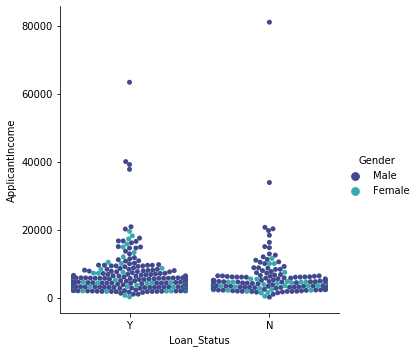

In [30]:
sns.catplot(x='Loan_Status', y='ApplicantIncome', hue='Gender', kind='swarm',palette='mako', edgecolor='.6', data=arquivo_train)

No Gráfico acima é possível analisar que a quantidade de homens que solicitam o empréstimo é muito maior em ambas situações, sendo aprovado ou não, além disso existe alguns outliers que podem fazer com que a média dos dados seja análisada de forma equivocada em relação a renda dos requerentes. E uma parte muito considerada da população que solicita o empréstimo possui uma renda abaixo de 20.000.

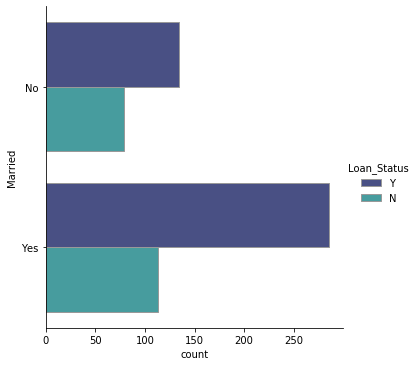

In [29]:
sns.catplot(y='Married', hue='Loan_Status', kind='count',
            palette='mako', edgecolor='.6',
            data=arquivo_train)

Quase o dobro de pessoas que solicitam empréstimo são casadas e isso é interessante por levantar alguns pontos: será que a busca pelo empréstimo seria para compra de imóveis? gastos com a festa do casamento ou viagens? à partir de qual momento pessoas casadas buscam por empréstimo?

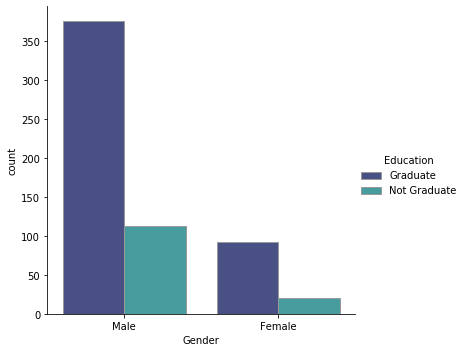

In [42]:
sns.catplot(x='Gender', hue='Education', kind='count', palette='mako', edgecolor='.6', data=arquivo_train)

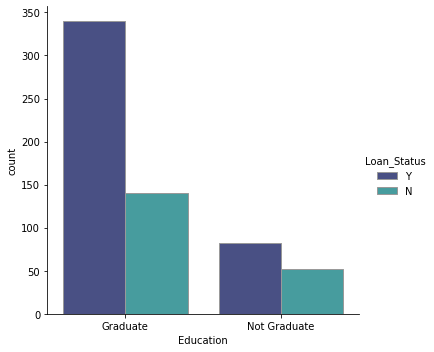

In [43]:
sns.catplot(x='Education', hue='Loan_Status', kind='count', palette='mako', edgecolor='.6', data=arquivo_train)

O dobro de pessoas que solicitam empréstimo são graduadas e a maioria dos graduados são homens e essa informação corresponde ao fato de que homens solicitam mais do que mulheres.

<Figure size 1440x360 with 0 Axes>

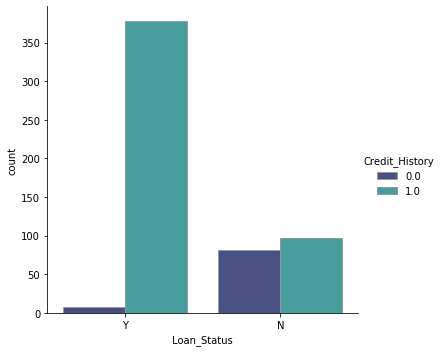

In [51]:
plt.figure(figsize=(20,5))
sns.catplot(x='Loan_Status', hue='Credit_History', kind='count', palette='mako', edgecolor='.6', data=arquivo_train)

Sem muitas surpresas o histórico de crédito influência diretamente na aprovação do empréstimo. 

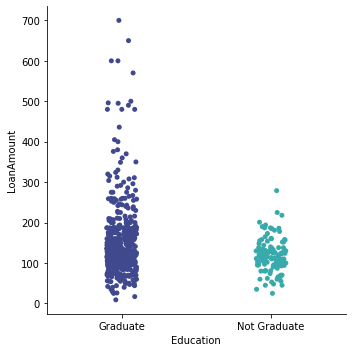

In [56]:
sns.catplot(x='Education', y='LoanAmount', palette='mako', edgecolor='.6',data=arquivo_train)

É possível que exista uma relação entre o montanta do empréstimo e o nível de escolaridade de quem solicita, mas é necessário analisar outros fatores para essa possível afirmação.

C:\Users\prisc\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\prisc\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


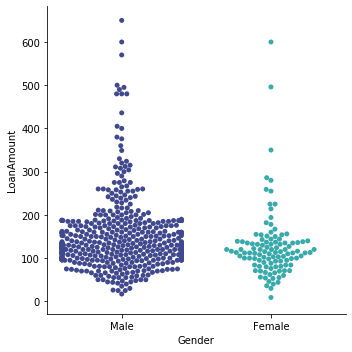

In [57]:
sns.catplot(x='Gender', y='LoanAmount', kind="swarm", palette='mako', edgecolor='.6', data=arquivo_train)

Em geral é bem próximo o montante do empréstimo liberado para homens e mulheres.

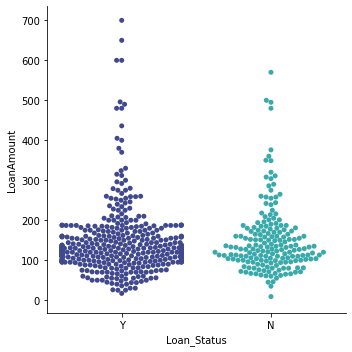

In [58]:
sns.catplot(x='Loan_Status', y='LoanAmount', kind="swarm", palette='mako', edgecolor='.6', data=arquivo_train)

É bem concentrado o montante do empréstimo em relação a quem tem a aprovação ou negativa, poucos são os que pedem um valor acima da média. 